In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv(r"C:\Users\Acer\Desktop\Dataset\Social_Network_Ads.csv")

In [3]:
data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [5]:
data.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [7]:
from imblearn.over_sampling import SMOTE
s=SMOTE()
x_data,y_data=s.fit_resample(x,y)

In [8]:
from collections import Counter
print("The Original data :",Counter(y))
print("The Artificial data :",Counter(y_data))


The Original data : Counter({0: 257, 1: 143})
The Artificial data : Counter({0: 257, 1: 257})


In [9]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5,random_state=2,shuffle=True)
kf.get_n_splits(x_data)
print(kf)

KFold(n_splits=5, random_state=2, shuffle=True)


In [10]:
for train_index,test_index in kf.split(x_data):
    print("TRAIN : ",train_index,"TEST : ",test_index)
    x_train,x_test=x_data[train_index],x_data[test_index]
    y_train,y_test=y_data[train_index],y_data[test_index]

TRAIN :  [  0   2   3   4   5   6   8   9  10  11  13  16  17  19  21  22  23  25
  26  27  29  30  31  33  34  35  36  37  38  39  42  43  44  45  46  47
  48  49  50  51  52  53  54  56  57  58  59  60  61  62  63  64  68  70
  71  72  73  74  75  76  78  79  80  81  82  83  85  86  87  88  90  91
  92  93  94  95  96  97  98  99 101 102 104 105 106 107 108 110 111 112
 113 114 115 116 117 118 119 121 122 123 124 125 126 127 128 130 132 133
 134 135 136 137 138 139 140 142 143 144 145 147 148 149 150 151 153 156
 157 158 159 160 162 163 164 166 167 168 169 170 171 172 174 177 181 182
 184 185 186 187 188 189 190 191 192 195 196 197 201 202 203 204 205 206
 207 208 209 210 211 212 213 214 215 217 218 219 220 221 222 223 224 226
 227 229 230 232 233 234 237 238 239 240 241 242 243 244 245 246 247 248
 249 250 252 253 254 255 256 257 260 261 262 263 264 265 270 271 272 273
 274 276 277 278 279 280 283 285 286 287 288 289 290 291 292 293 294 295
 296 297 298 299 302 307 308 309 310 311 3

[0.90361446 0.87951807 0.86585366 0.82926829 0.85365854]
86.6382603585072


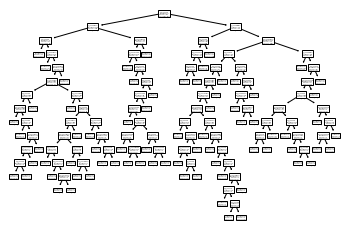

In [12]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion="entropy",random_state=0)
classifier=classifier.fit(x_data,y_data)
tree.plot_tree(classifier)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, x_train,y_train, cv=kf)
print(scores)
print(np.mean(scores)*100)

In [13]:
from sklearn.model_selection import cross_val_predict
y1_pred=cross_val_predict(classifier,x_test,y_test,cv=kf)
y1_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [14]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
ac1 = accuracy_score(y_test,y1_pred)*100
cm1 = confusion_matrix(y_test,y1_pred)
print("accuracy score : ",ac1)
print("confusion matrix :")
print(cm1)

accuracy score :  84.31372549019608
confusion matrix :
[[47  7]
 [ 9 39]]
